<a href="https://colab.research.google.com/github/nakul8820/Computer_vision/blob/main/Fracture_detction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
path = kagglehub.dataset_download("pkdarabi/bone-fracture-detection-computer-vision-project")

Using Colab cache for faster access to the 'bone-fracture-detection-computer-vision-project' dataset.


In [ ]:
import os

print("Contents of the downloaded dataset")
print(os.listdir(path))

Contents of the downloaded dataset
['bone fracture detection.v4-v4.yolov8', 'BoneFractureYolo8']


#since our data is already pre-processed with yolov8 model . we can directlt jump to training pipeline.

In [ ]:
yolo_folder = os.path.join('/kaggle/input/bone-fracture-detection-computer-vision-project/bone fracture detection.v4-v4.yolov8')
yaml_path = os.path.join(yolo_folder , 'data.yaml')

print(yaml_path)

/kaggle/input/bone-fracture-detection-computer-vision-project/bone fracture detection.v4-v4.yolov8/data.yaml


In [ ]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.8 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
import os
model = YOLO('yolov8s.pt') #small and medium
model1 = YOLO('yolov8m.pt')  #key difference is parameter and computational complexity

path = '/kaggle/input/bone-fracture-detection-computer-vision-project/bone fracture detection.v4-v4.yolov8'
data_yaml = os.path.join(path,'data.yaml')

results = model.train( data = data_yaml  ,
                      epochs = 11 ,
                       imgsz = 640,
                       name='bone_facture')


Ultralytics 8.3.232 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/bone-fracture-detection-computer-vision-project/bone fracture detection.v4-v4.yolov8/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=25, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=bone_facture, nbs=64, nms=False, opset=None, optimize=Fals

KeyboardInterrupt: 

In [ ]:

WEIGHTS_PATH = '/content/runs/detect/bone_facture/weights/best.pt'

# test images.
SOURCE_PATH = '/kaggle/input/bone-fracture-detection-computer-vision-project/bone fracture detection.v4-v4.yolov8/test/images'

# Load the trained model
model = YOLO(WEIGHTS_PATH)

print(f"Starting inference on all images in: {SOURCE_PATH}")

results = model.predict(
    source=SOURCE_PATH,
    conf=0.25,        # Confidence threshold (adjust based on performance)
    iou=0.7,          # IoU threshold for Non-Maximum Suppression (NMS)
    imgsz=640,        # Image size
    save=True,        # Save the resulting image with bounding boxes
    name='inference_folder_run' # The results will be saved in a folder with this name
)

print("\nInference complete. Results saved and details accessible.")

Starting inference on all images in: /kaggle/input/bone-fracture-detection-computer-vision-project/bone fracture detection.v4-v4.yolov8/test/images

image 1/169 /kaggle/input/bone-fracture-detection-computer-vision-project/bone fracture detection.v4-v4.yolov8/test/images/distal-humerus-fracture-1_jpg.rf.831cb137cfcbde1079f86abd5f5f2867.jpg: 640x256 (no detections), 44.4ms
image 2/169 /kaggle/input/bone-fracture-detection-computer-vision-project/bone fracture detection.v4-v4.yolov8/test/images/image1_0_png.rf.99862308d714bff3f9c410adf5ca93ac.jpg: 480x640 (no detections), 44.6ms
image 3/169 /kaggle/input/bone-fracture-detection-computer-vision-project/bone fracture detection.v4-v4.yolov8/test/images/image1_1000_png.rf.a53c5e186c03961bf88075c6e3e94cf6.jpg: 544x640 1 humerus, 44.7ms
image 4/169 /kaggle/input/bone-fracture-detection-computer-vision-project/bone fracture detection.v4-v4.yolov8/test/images/image1_1015_png.rf.3b7320c3c40771fa5532bf713a728b83.jpg: 544x640 (no detections), 15.7m

In [ ]:
for i, r in enumerate(results):
    print(f"\n--- Results for Image #{i+1} ---")
    if len(r.boxes) > 0:
        print(f"Found {len(r.boxes)} potential fracture(s):")
        for box in r.boxes:
            conf = box.conf.item()
            cls_id = box.cls.item()
            label = r.names[cls_id]


            print(f"  Detected: {label} with confidence {conf:.2f}")
    else:
        print("No fractures detected in this image.")


--- Results for Image #1 ---
No fractures detected in this image.

--- Results for Image #2 ---
No fractures detected in this image.

--- Results for Image #3 ---
Found 1 potential fracture(s):
  Detected: humerus with confidence 0.35

--- Results for Image #4 ---
No fractures detected in this image.

--- Results for Image #5 ---
No fractures detected in this image.

--- Results for Image #6 ---
No fractures detected in this image.

--- Results for Image #7 ---
No fractures detected in this image.

--- Results for Image #8 ---
No fractures detected in this image.

--- Results for Image #9 ---
No fractures detected in this image.

--- Results for Image #10 ---
No fractures detected in this image.

--- Results for Image #11 ---
Found 1 potential fracture(s):
  Detected: humerus with confidence 0.65

--- Results for Image #12 ---
No fractures detected in this image.

--- Results for Image #13 ---
Found 1 potential fracture(s):
  Detected: forearm fracture with confidence 0.75

--- Result


--- Results for distal-humerus-fracture-1_jpg.rf.831cb137cfcbde1079f86abd5f5f2867.jpg ---
No fractures detected in this image.

--- Results for image1_0_png.rf.99862308d714bff3f9c410adf5ca93ac.jpg ---
No fractures detected in this image.

--- Results for image1_1000_png.rf.a53c5e186c03961bf88075c6e3e94cf6.jpg ---


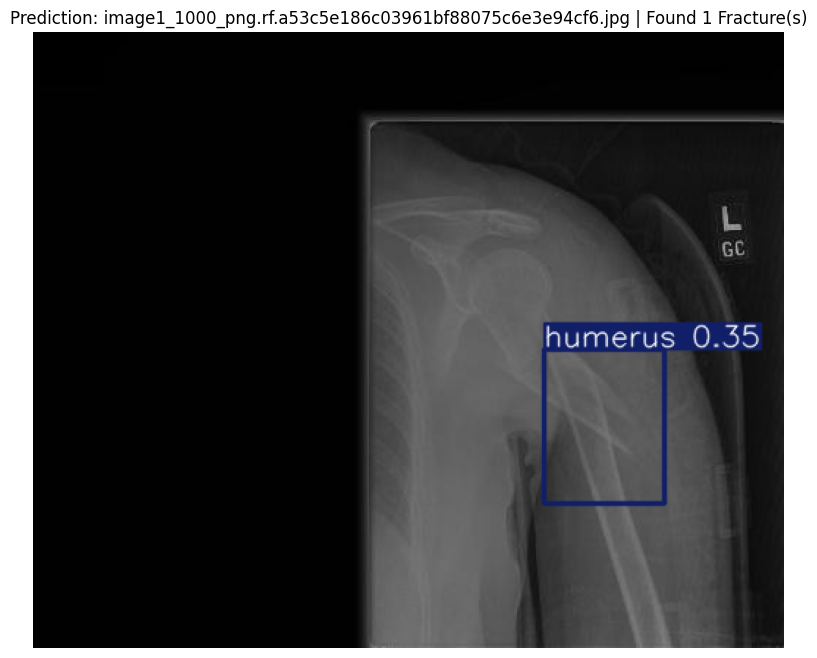

Found 1 potential fracture(s):
  Detected: humerus with confidence 0.35

--- Results for image1_1015_png.rf.3b7320c3c40771fa5532bf713a728b83.jpg ---
No fractures detected in this image.

--- Results for image1_1015_png.rf.9181f8eb07451331e22381bacb3a5bd2.jpg ---
No fractures detected in this image.

--- Results for image1_1033_png.rf.4bbf6560a26646b1d3a1ab600aa19251.jpg ---
No fractures detected in this image.

--- Results for image1_1035_png.rf.d7493a5653bc3628f7a1b1ec0eb5de85.jpg ---
No fractures detected in this image.

--- Results for image1_1044_png.rf.1e17d3a8637036ef4b3e1c5d0b88011f.jpg ---
No fractures detected in this image.

--- Results for image1_1057_png.rf.dbd0e857728d8b149e5732cb2824d819.jpg ---
No fractures detected in this image.

--- Results for image1_1070_png.rf.d01735eab2c774146e40eef6c8e7b661.jpg ---
No fractures detected in this image.

--- Results for image1_1084_png.rf.d9da08b77872f6b4282f2700d216b9b3.jpg ---


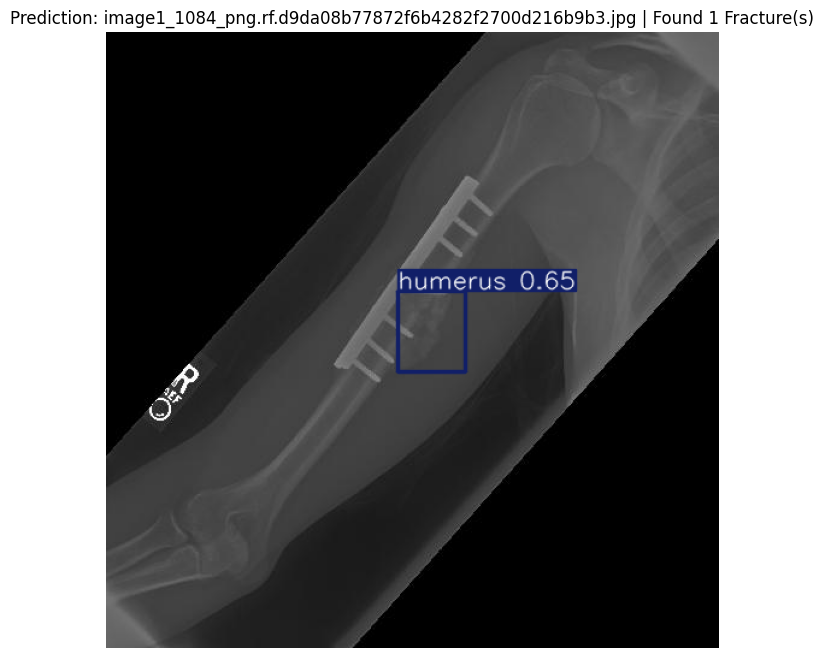

Found 1 potential fracture(s):
  Detected: humerus with confidence 0.65

--- Results for image1_1101_png.rf.76b621303ad7da308e79a2e39d860675.jpg ---
No fractures detected in this image.

--- Results for image1_1126_png.rf.66c21ce21ee255ed4bdc66164bac87c5.jpg ---


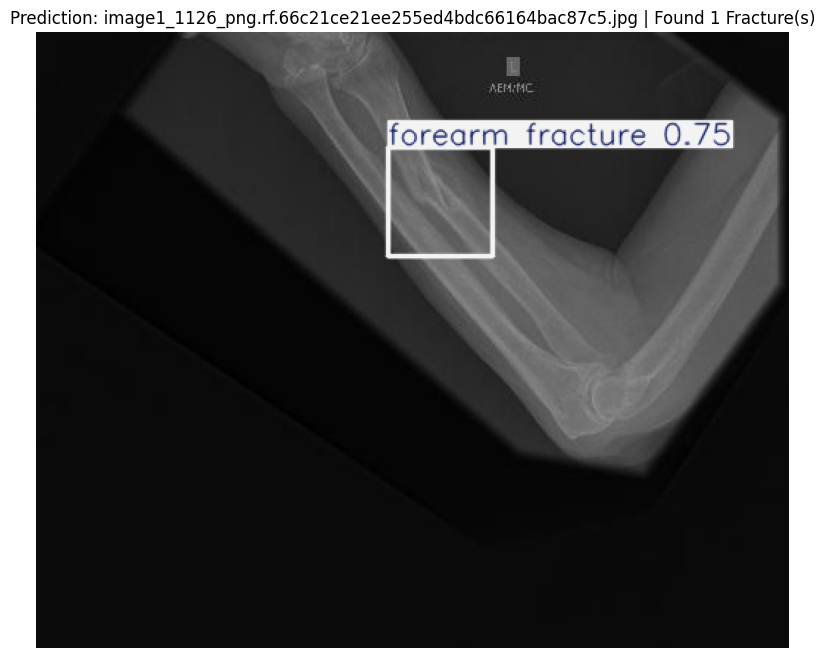

Found 1 potential fracture(s):
  Detected: forearm fracture with confidence 0.75

--- Results for image1_1134_png.rf.642f46a1f0f794f24f5aa3edcf58bdcf.jpg ---
No fractures detected in this image.

--- Results for image1_1137_png.rf.fd851f5a4b2be36de41c54ec6a53c989.jpg ---
No fractures detected in this image.

--- Results for image1_1175_png.rf.aad108f3739e48313c773ad1392a8966.jpg ---


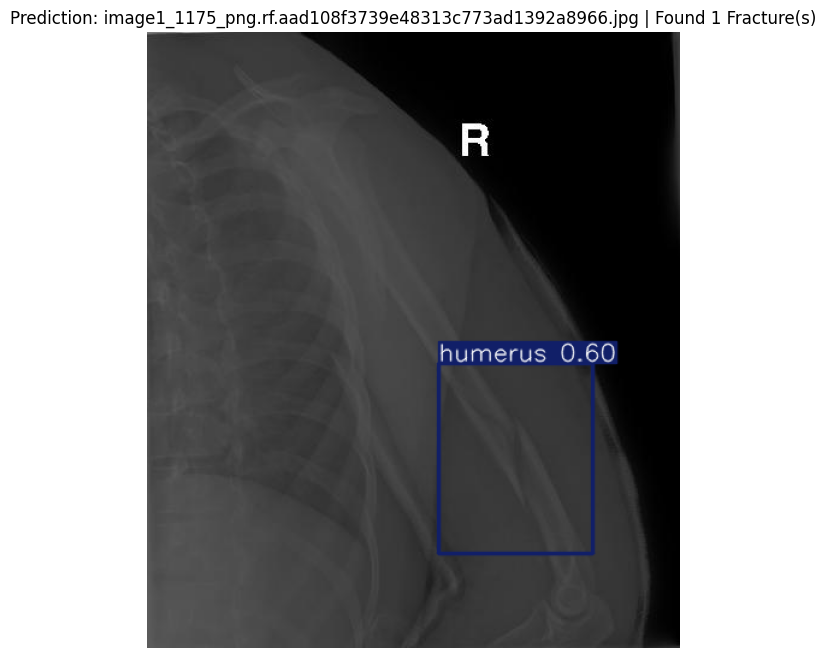

Found 1 potential fracture(s):
  Detected: humerus with confidence 0.60

--- Results for image1_117_png.rf.e200e6b84f70bd27ba1e1123d052755e.jpg ---
No fractures detected in this image.

--- Results for image1_1233_png.rf.4e2b7dc04a17f7f3a33a343e8f7ee67e.jpg ---
No fractures detected in this image.

--- Results for image1_125_png.rf.0025d3a37097e5e1e913d6b36f38df9a.jpg ---
No fractures detected in this image.

--- Results for image1_1284_png.rf.45c8239cf68c001ba91d7d002729eec7.jpg ---
No fractures detected in this image.

--- Results for image1_12_png.rf.5f6971023573ad4a240a4e4c4dae0e5f.jpg ---
No fractures detected in this image.

--- Results for image1_1311_png.rf.27646e931562cc3823c79f79472b8749.jpg ---
No fractures detected in this image.

--- Results for image1_1326_png.rf.6019c7e15df84d9d6286932d03e687b6.jpg ---
No fractures detected in this image.

--- Results for image1_1359_png.rf.7475a35f950cea14d8dcd975042229b2.jpg ---
No fractures detected in this image.

--- Results for ima

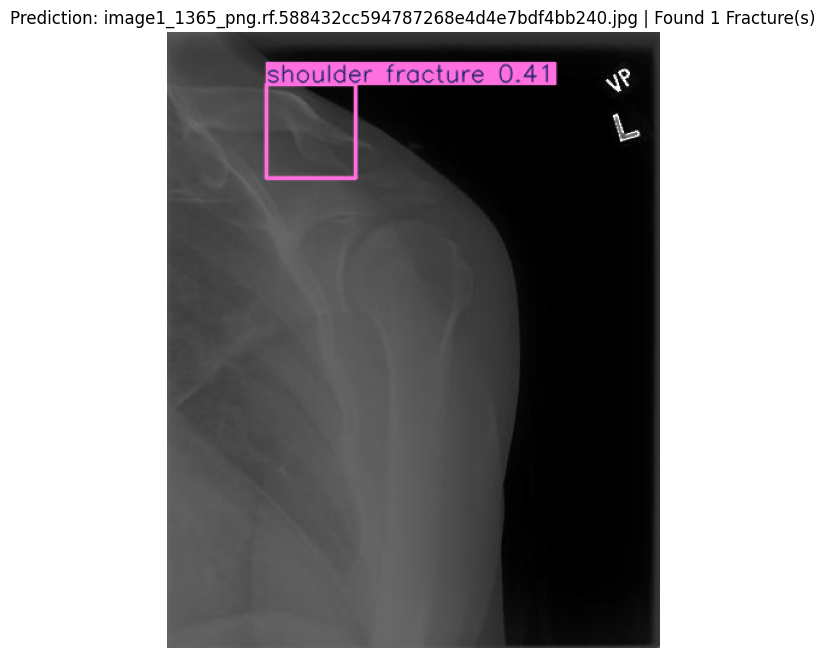

Found 1 potential fracture(s):
  Detected: shoulder fracture with confidence 0.41

--- Results for image1_137_png.rf.996f3c880689913494b8c7baae7a6f0d.jpg ---
No fractures detected in this image.

--- Results for image1_1392_png.rf.692d8594c2ce39483af8c3c4fee91646.jpg ---
No fractures detected in this image.

--- Results for image1_145_png.rf.a69d928d011a93d25a95b7b8380ea25d.jpg ---


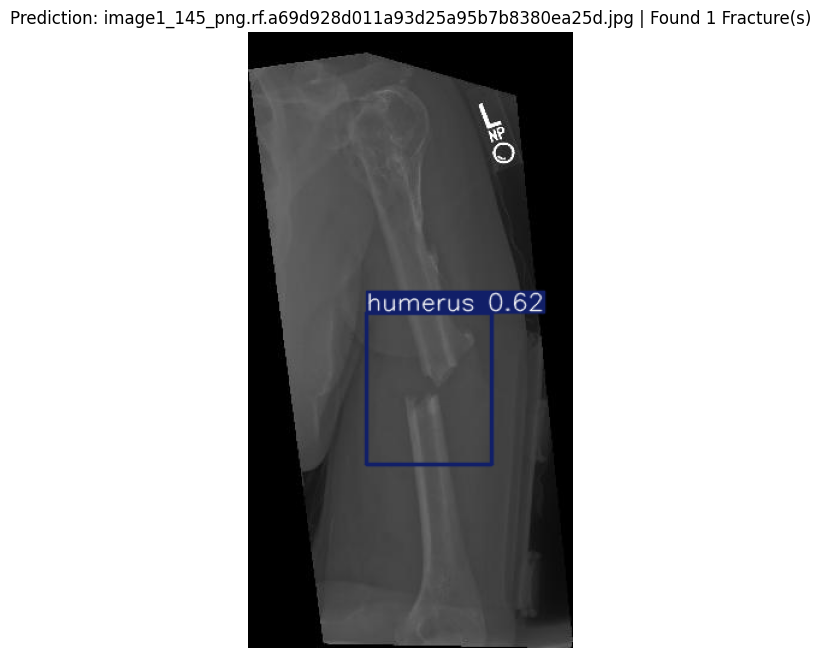

Found 1 potential fracture(s):
  Detected: humerus with confidence 0.62

--- Results for image1_1471_png.rf.3ba297237985853fdf9e2c9f79f07f1d.jpg ---
No fractures detected in this image.

--- Results for image1_148_png.rf.b9799a5fddd2b4b2b747dc5c49f1643f.jpg ---
No fractures detected in this image.

--- Results for image1_152_png.rf.f6e7109e7499a7a20e4fc8c0940603d3.jpg ---
No fractures detected in this image.

--- Results for image1_1545_png.rf.cd2ce2cc69004944f0d920c4bda34592.jpg ---
No fractures detected in this image.

--- Results for image1_154_png.rf.bf5cc83ea60cb0fd21d1f21ab7055f9d.jpg ---
No fractures detected in this image.

--- Results for image1_1553_png.rf.ec209f9a8e0e7a41b30a1683a4574f00.jpg ---
No fractures detected in this image.

--- Results for image1_1563_png.rf.4d5bc124b48e7d4d2636d2d6691e36f2.jpg ---
No fractures detected in this image.

--- Results for image1_1588_png.rf.aba29f401dee4db13fc5434f3c0186b4.jpg ---


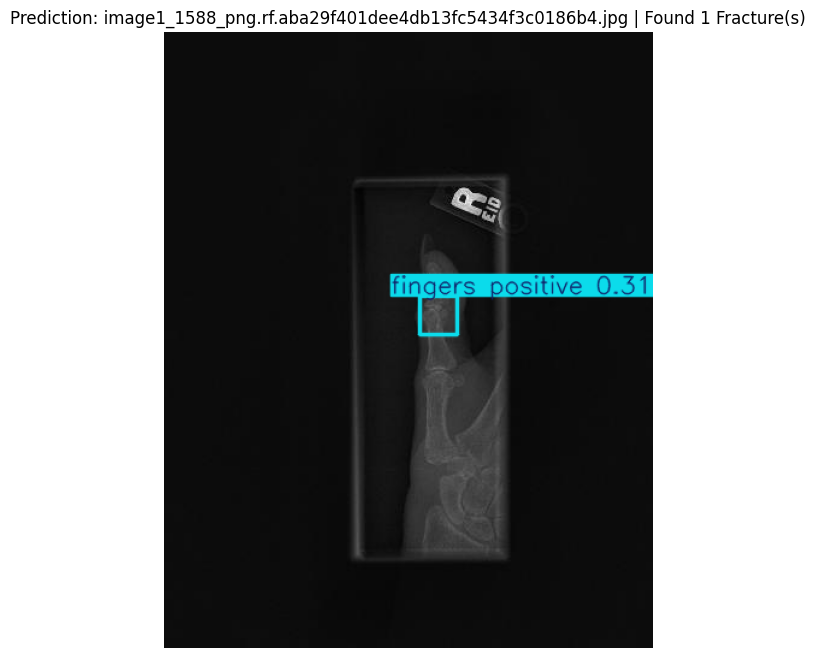

Found 1 potential fracture(s):
  Detected: fingers positive with confidence 0.31

--- Results for image1_164_png.rf.ed315410a29883c298454af69f3ae895.jpg ---
No fractures detected in this image.

--- Results for image1_1682_png.rf.8c3d0845adaa6d884f90b3a020573069.jpg ---
No fractures detected in this image.

--- Results for image1_1741_png.rf.abfab4411413ca60310f9787db4d8d83.jpg ---


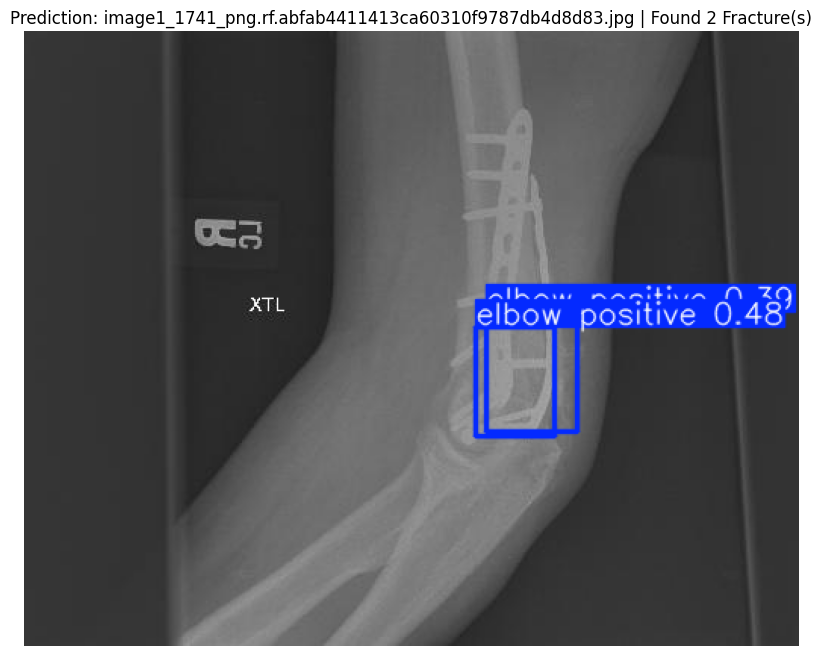

Found 2 potential fracture(s):
  Detected: elbow positive with confidence 0.48
  Detected: elbow positive with confidence 0.39

--- Results for image1_1796_png.rf.42413ce321f53b714fc52ffa1d1a2021.jpg ---
No fractures detected in this image.

--- Results for image1_1813_png.rf.36e36804ccd3bc72b0fc02d36029d08f.jpg ---
No fractures detected in this image.

--- Results for image1_182_png.rf.c9539857a1608ea4850d37195ff767ce.jpg ---
No fractures detected in this image.

--- Results for image1_184_png.rf.e493197224b25d2fe8234345382fb4b9.jpg ---
No fractures detected in this image.

--- Results for image1_186_png.rf.e7ef27f31171ef062f867a9043ecb879.jpg ---
No fractures detected in this image.

--- Results for image1_189_png.rf.9fe16c915039954baf6675c96b2bacc6.jpg ---
No fractures detected in this image.

--- Results for image1_1981_png.rf.05106dc3354a8d2c4292cacd2813aae1.jpg ---


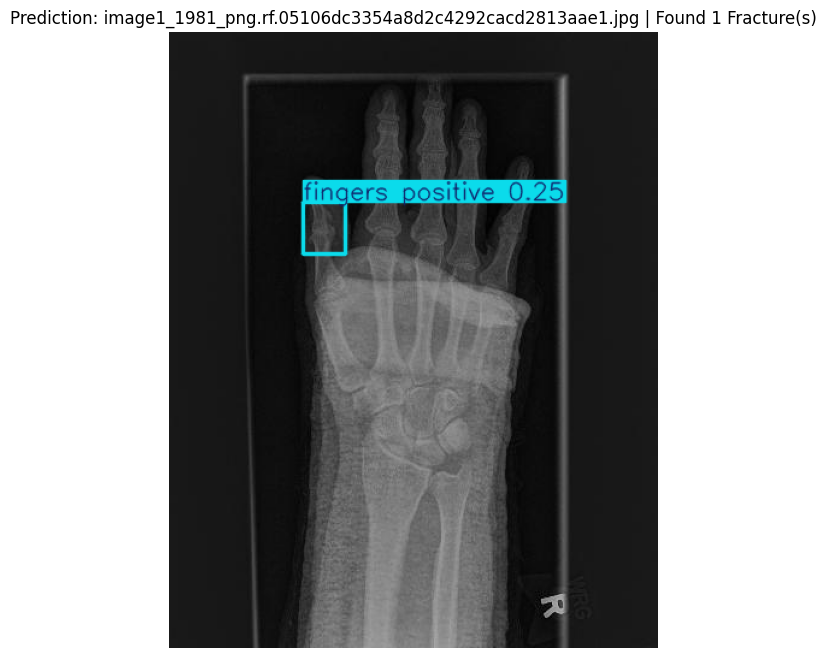

Found 1 potential fracture(s):
  Detected: fingers positive with confidence 0.25

--- Results for image1_1_png.rf.ff3f4a12a8e46a9a9aecace2ebf3869a.jpg ---
No fractures detected in this image.

--- Results for image1_211_png.rf.e1fd0ca40a197d13f9ecae59c4074d43.jpg ---
No fractures detected in this image.

--- Results for image1_2128_png.rf.9cdb5d69b7f964d77ef2cd8ddaa64b3d.jpg ---
No fractures detected in this image.

--- Results for image1_212_png.rf.2ffb29b8c57630c49b7ee34bce2c46f3.jpg ---
No fractures detected in this image.

--- Results for image1_2157_png.rf.37cf76e910103b2aa83a2c925849f300.jpg ---


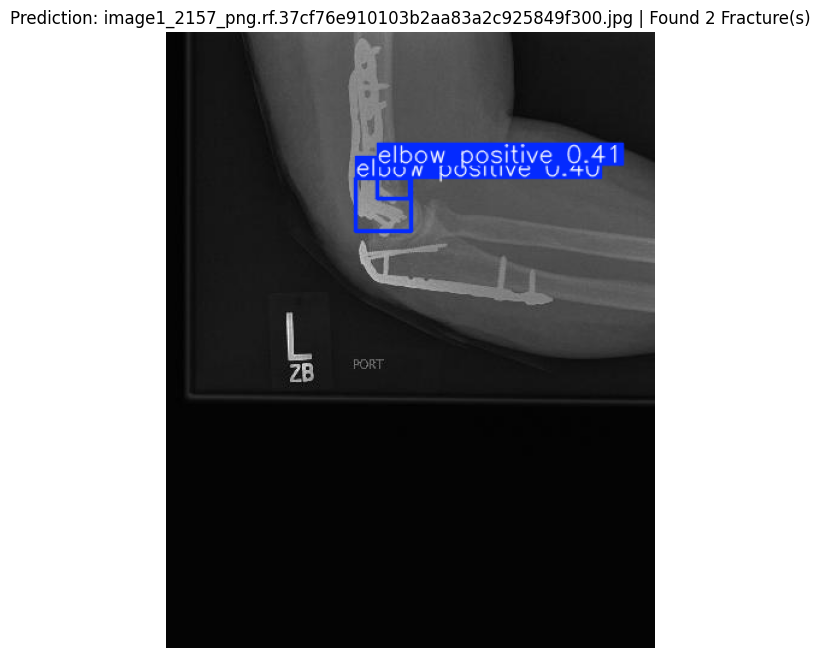

Found 2 potential fracture(s):
  Detected: elbow positive with confidence 0.41
  Detected: elbow positive with confidence 0.40

--- Results for image1_2207_png.rf.826e33db891514f1a14c23ece2273e7e.jpg ---


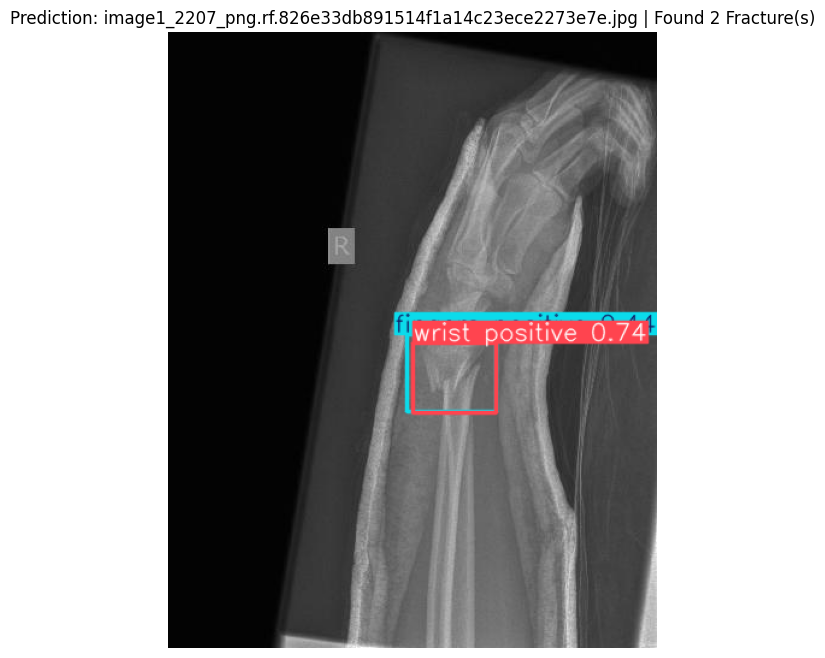

Found 2 potential fracture(s):
  Detected: wrist positive with confidence 0.74
  Detected: fingers positive with confidence 0.44

--- Results for image1_2263_png.rf.43688af1368a72ad0bc6719a5dcab20b.jpg ---
No fractures detected in this image.

--- Results for image1_22_png.rf.bb53a5b5275a858894f501512908f07a.jpg ---
No fractures detected in this image.

--- Results for image1_230_png.rf.f2a3605e418617cb313976daaec78e18.jpg ---
No fractures detected in this image.

--- Results for image1_2336_png.rf.76087ca1e6263ce05700b7e1f92b9f02.jpg ---


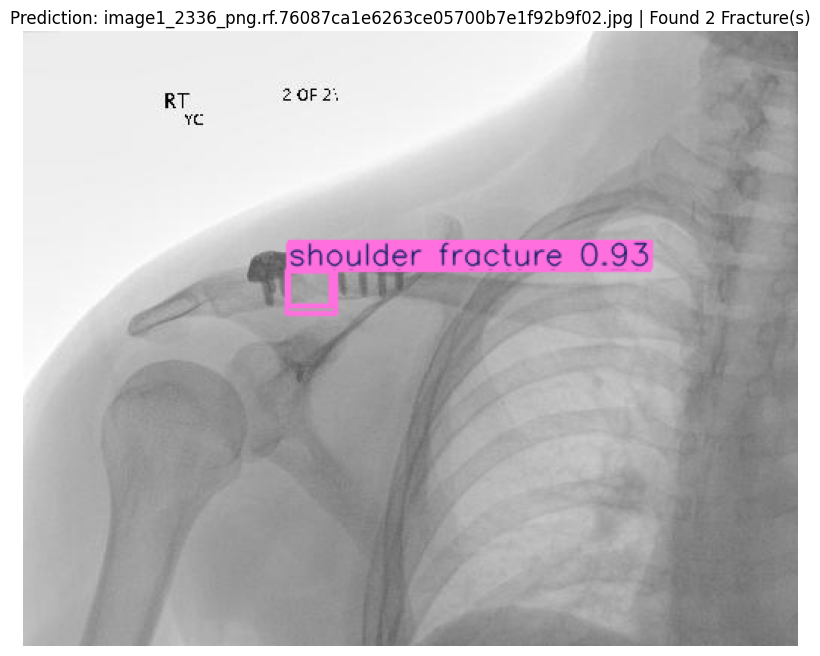

Found 2 potential fracture(s):
  Detected: shoulder fracture with confidence 0.93
  Detected: shoulder fracture with confidence 0.29

--- Results for image1_23_png.rf.da8bbef32848f32a8d5434e328b10428.jpg ---
No fractures detected in this image.

--- Results for image1_240_png.rf.c8b0cfb57aef2e4bc78d5a716909fd94.jpg ---
No fractures detected in this image.

--- Results for image1_241_png.rf.9429a19b000ff9abd6339900245fb1ba.jpg ---
No fractures detected in this image.

--- Results for image1_252_png.rf.81a8e63687d8630d28257570bd5fcd80.jpg ---
No fractures detected in this image.

--- Results for image1_258_png.rf.7d64b6239897f6838c97b4d18d6ed0c9.jpg ---
No fractures detected in this image.

--- Results for image1_2600_png.rf.01b17c4166e1ea6a863191eebfff35ae.jpg ---
No fractures detected in this image.

--- Results for image1_268_png.rf.00406f976b1bd6c978e828d2c5085683.jpg ---
No fractures detected in this image.

--- Results for image1_2694_png.rf.6390e595cb681c436da1dfa7b2c78dfd.jpg ---

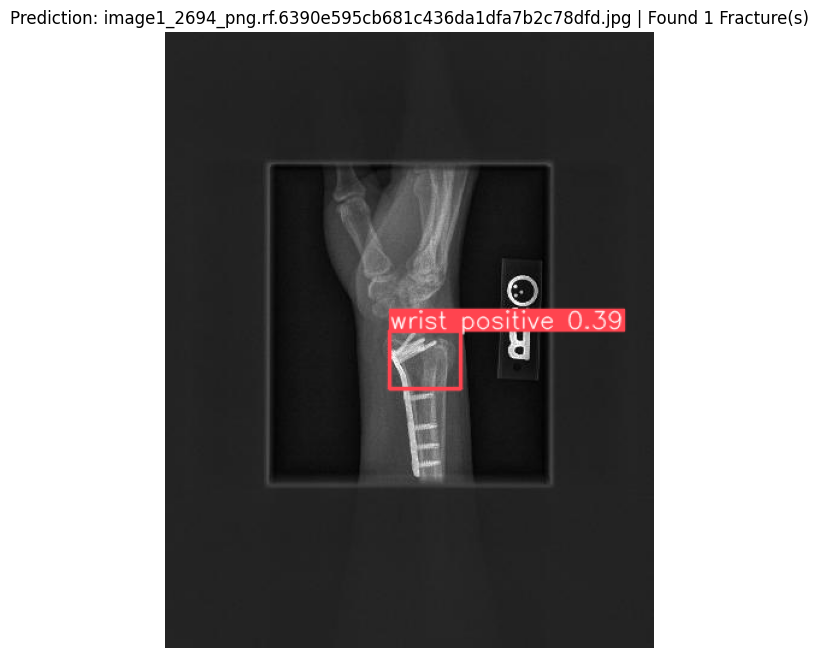

Found 1 potential fracture(s):
  Detected: wrist positive with confidence 0.39

--- Results for image1_26_png.rf.ea3697c11878702d0b7728d240e2eb75.jpg ---


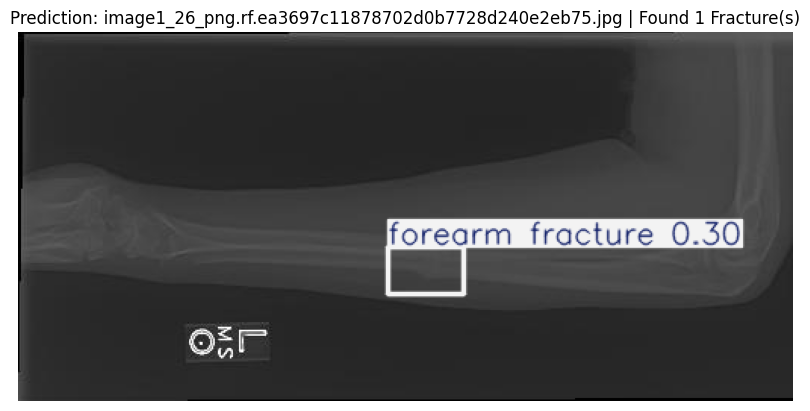

Found 1 potential fracture(s):
  Detected: forearm fracture with confidence 0.30

--- Results for image1_273_png.rf.b2d75c97ef473f97c7077eb114856b2a.jpg ---


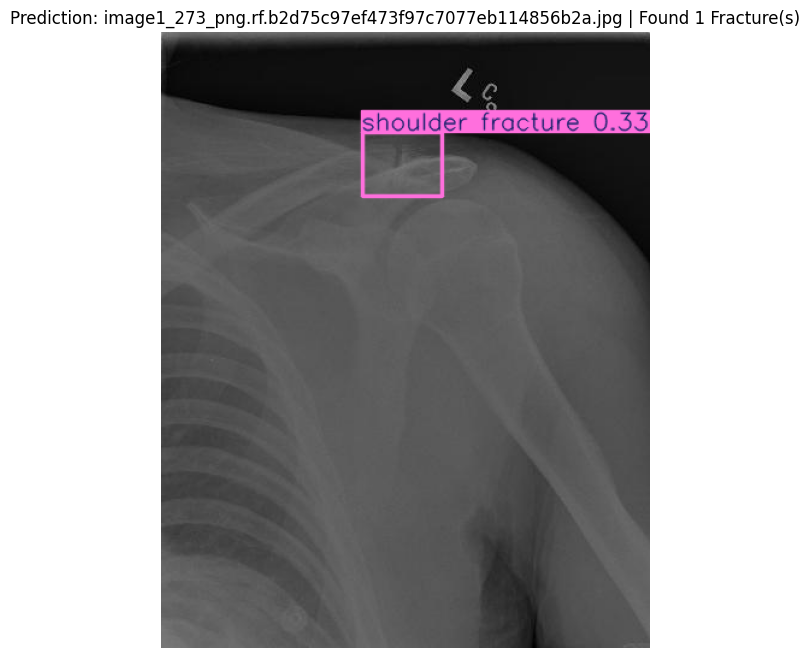

Found 1 potential fracture(s):
  Detected: shoulder fracture with confidence 0.33

--- Results for image1_2794_png.rf.6b3aeafbe8917839f42840a597349a32.jpg ---
No fractures detected in this image.

--- Results for image1_279_png.rf.b40ab0fc72a8fff98daa57979d24b206.jpg ---
No fractures detected in this image.

--- Results for image1_2818_png.rf.3ef0c89fed24793069ef7828f4978ab4.jpg ---


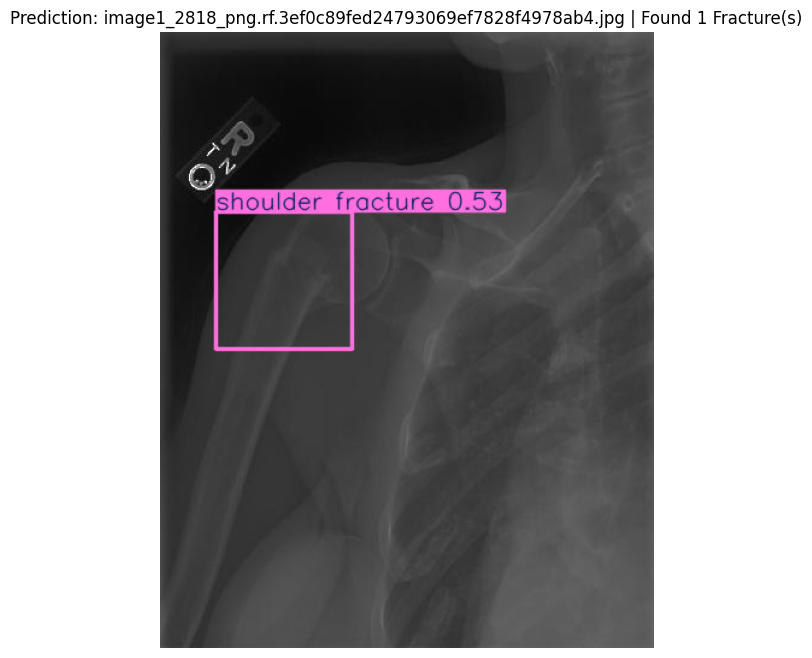

Found 1 potential fracture(s):
  Detected: shoulder fracture with confidence 0.53

--- Results for image1_283_png.rf.f41cf5bd6aa70a2216bb701856df9e03.jpg ---
No fractures detected in this image.

--- Results for image1_291_png.rf.c5a2f62a6316d1ebd9f91cb85ed65891.jpg ---
No fractures detected in this image.

--- Results for image1_2959_png.rf.87b65aa9e9d80f284ae39c06d2892e6e.jpg ---
No fractures detected in this image.

--- Results for image1_300_png.rf.68c69212cc50665b9c1ffa7dd4eb25a4.jpg ---
No fractures detected in this image.

--- Results for image1_302_png.rf.dc3856686e28e1ff95efc721c7cda455.jpg ---
No fractures detected in this image.

--- Results for image1_3054_png.rf.4be16ac99458914b4a34d0892e5f7ff0.jpg ---
No fractures detected in this image.

--- Results for image1_3073_png.rf.241285b7d595353800440e6d2b9b91f0.jpg ---
No fractures detected in this image.

--- Results for image1_314_png.rf.870abcb0b0922e63bd5ba9389a1efd74.jpg ---
No fractures detected in this image.

--- Result

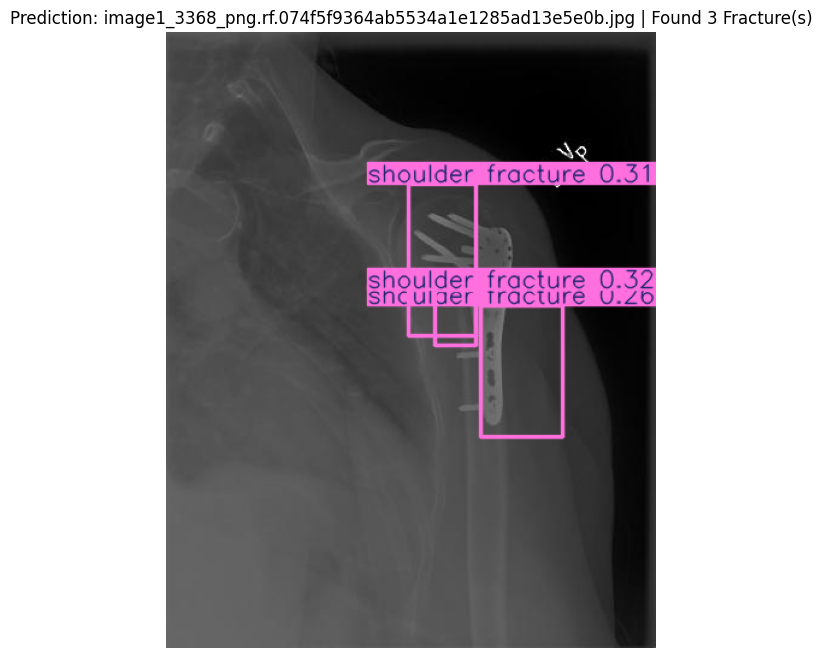

Found 3 potential fracture(s):
  Detected: shoulder fracture with confidence 0.32
  Detected: shoulder fracture with confidence 0.31
  Detected: shoulder fracture with confidence 0.26

--- Results for image1_336_png.rf.f758673053df7ac6e05b8671c2563062.jpg ---


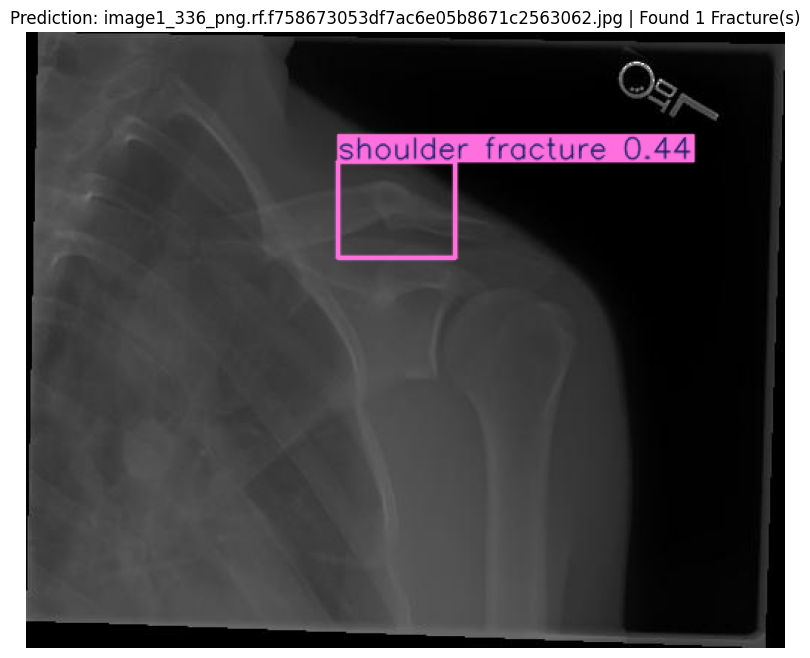

Found 1 potential fracture(s):
  Detected: shoulder fracture with confidence 0.44

--- Results for image1_3374_png.rf.c13f2204d119c696615bdfeb960e7748.jpg ---
No fractures detected in this image.

--- Results for image1_338_png.rf.617385aa69fa890a370a37684bae944f.jpg ---


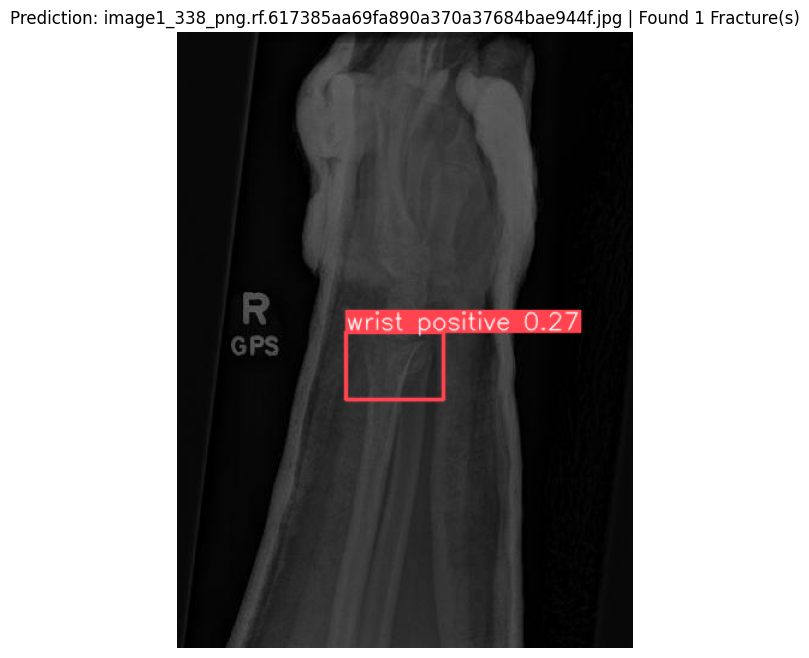

Found 1 potential fracture(s):
  Detected: wrist positive with confidence 0.27

--- Results for image1_33_png.rf.c1c24340e753b63b6f4e5079b8ef474d.jpg ---


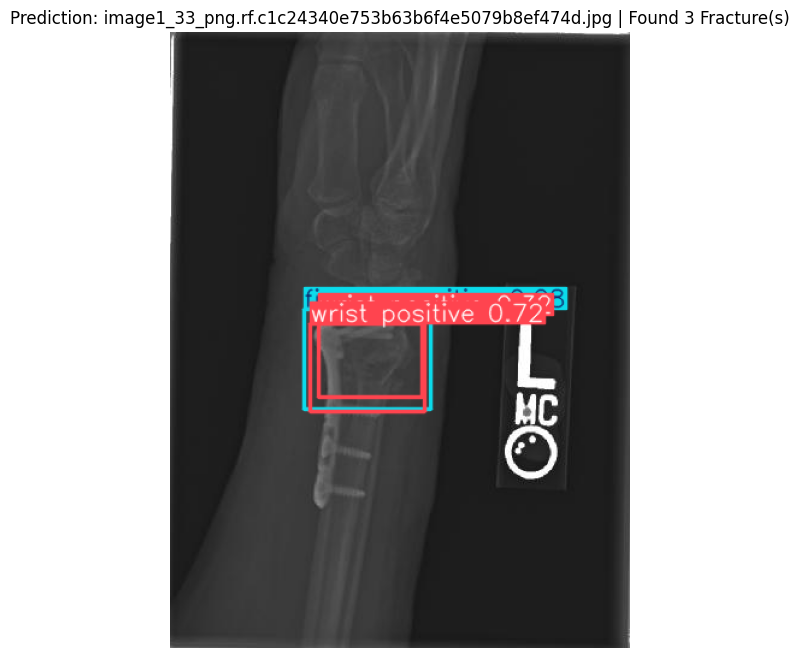

Found 3 potential fracture(s):
  Detected: wrist positive with confidence 0.72
  Detected: wrist positive with confidence 0.32
  Detected: fingers positive with confidence 0.28

--- Results for image1_340_png.rf.82476241970da952e6e27b1a9c43bef8.jpg ---
No fractures detected in this image.

--- Results for image1_3413_png.rf.d18ceb5ede7d864fef838167eae65120.jpg ---


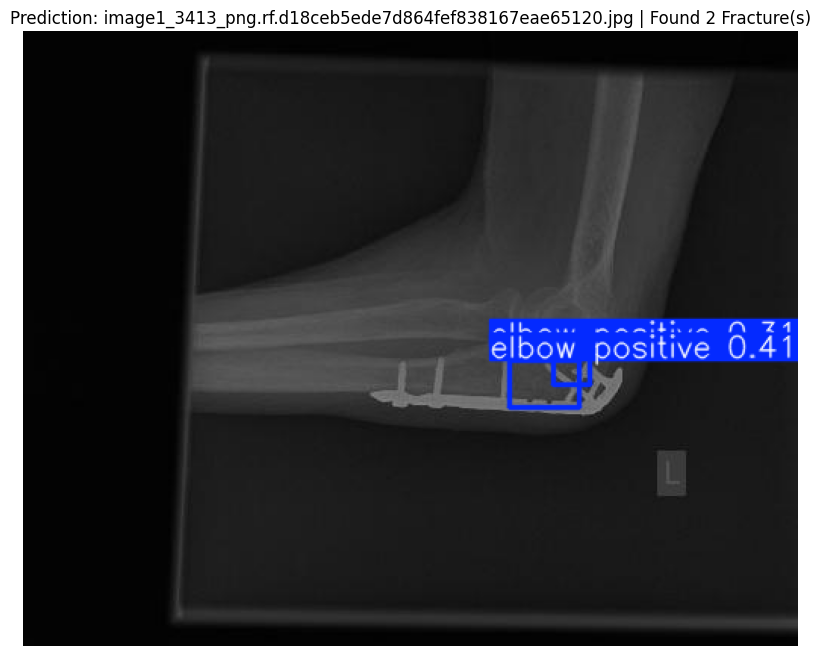

Found 2 potential fracture(s):
  Detected: elbow positive with confidence 0.41
  Detected: elbow positive with confidence 0.31

--- Results for image1_344_png.rf.d52b5bab514fb7cfb568da05594a6404.jpg ---
No fractures detected in this image.

--- Results for image1_350_png.rf.32b20b275bdbf30afb13d8d585da2743.jpg ---
No fractures detected in this image.

--- Results for image1_354_png.rf.4fafa55e4596998cceb97af05c87b38d.jpg ---
No fractures detected in this image.

--- Results for image1_355_png.rf.ae0f59ff3c26334cf587c5e76cc18b67.jpg ---
No fractures detected in this image.

--- Results for image1_3565_png.rf.52153ba946f07810b3c16f62d202db16.jpg ---
No fractures detected in this image.

--- Results for image1_358_png.rf.ae461871b8aa93ee2b62c42d61ada754.jpg ---
No fractures detected in this image.

--- Results for image1_3620_png.rf.484267b719f5e17f04fecfe359aff37d.jpg ---
No fractures detected in this image.

--- Results for image1_3726_png.rf.2876d2f0108b5a9fb5c23e8fb95f4625.jpg ---
No 

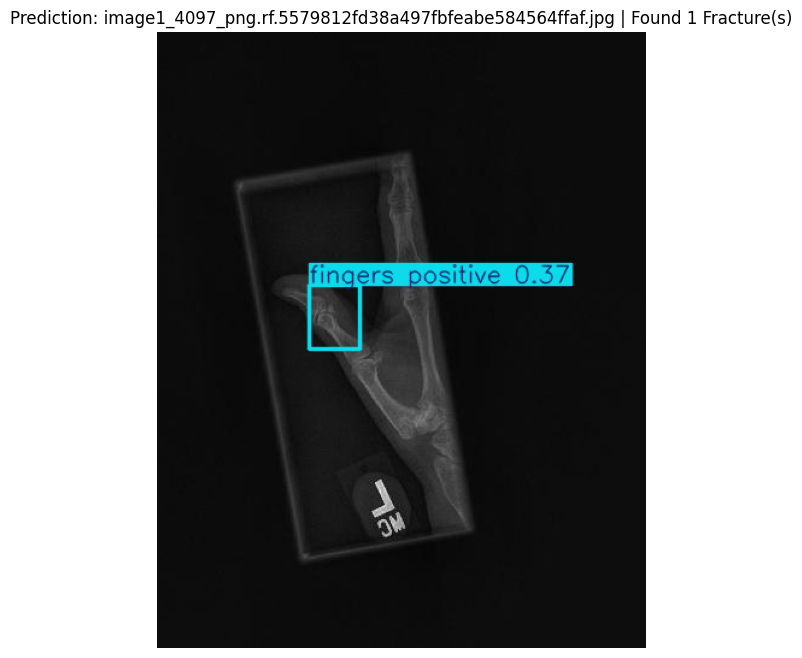

Found 1 potential fracture(s):
  Detected: fingers positive with confidence 0.37

--- Results for image1_40_png.rf.3404b7671f39e7295097dd6dabb28a97.jpg ---
No fractures detected in this image.

--- Results for image1_416_png.rf.4aaadbb2bfef18ef419564a862caa457.jpg ---


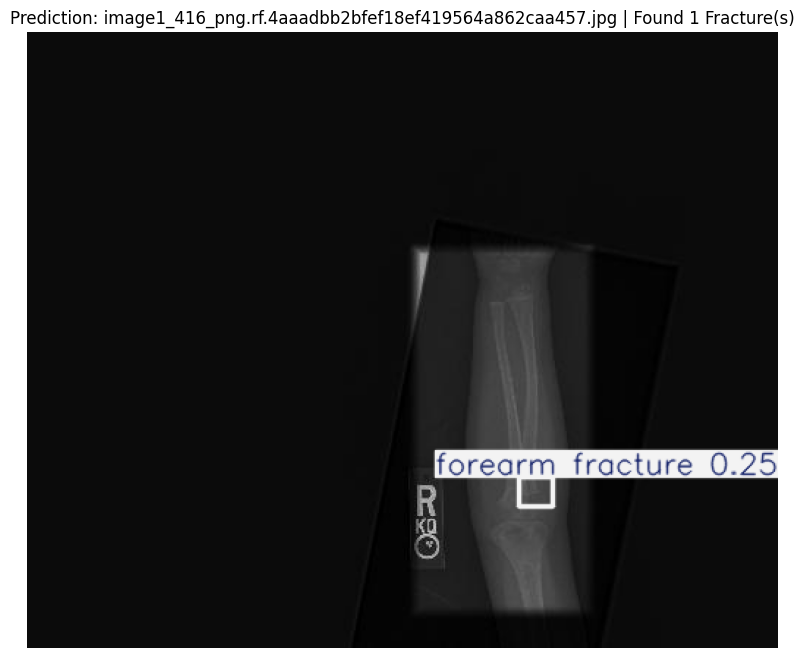

Found 1 potential fracture(s):
  Detected: forearm fracture with confidence 0.25

--- Results for image1_4300_png.rf.d4626ae6c3183d2419faae148cd72283.jpg ---


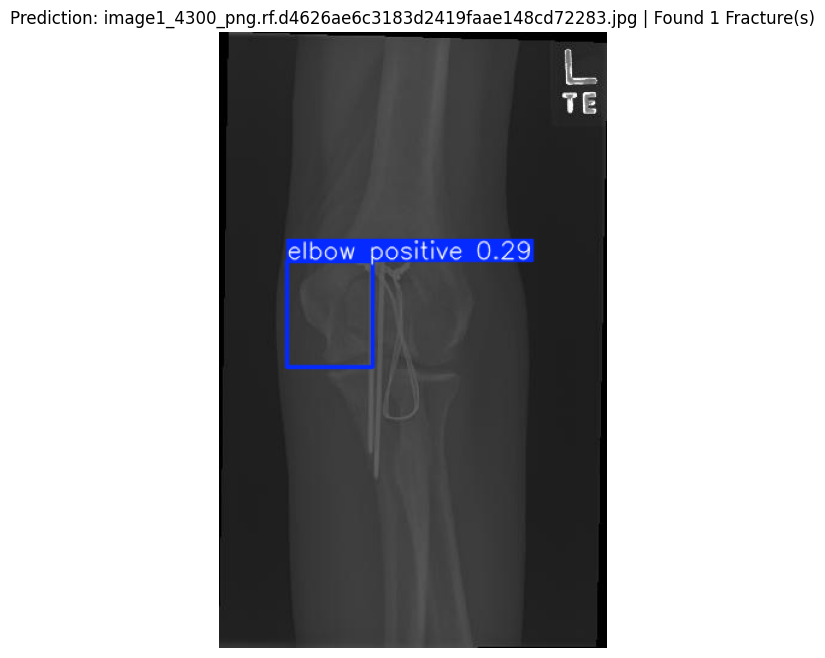

Found 1 potential fracture(s):
  Detected: elbow positive with confidence 0.29

--- Results for image1_432_png.rf.f040d366cb944d4ab64b58825db1fedc.jpg ---
No fractures detected in this image.

--- Results for image1_437_png.rf.fc6edfb87d799f751a64d540952739cc.jpg ---
No fractures detected in this image.

--- Results for image1_43_png.rf.9757e6d0c648b4544e9043ccc8fb31ca.jpg ---
No fractures detected in this image.

--- Results for image1_448_png.rf.70f487675effb06da9c6c334b5fe29cc.jpg ---
No fractures detected in this image.

--- Results for image1_4498_png.rf.36adec7c0d9bacf95faf5c87d28dfbe7.jpg ---
No fractures detected in this image.

--- Results for image1_4499_png.rf.8ed6bcadb4b1266886b392db6f1f1da2.jpg ---
No fractures detected in this image.

--- Results for image1_450_png.rf.c1640af9f113b3690185c7b22e1d76ec.jpg ---
No fractures detected in this image.

--- Results for image1_4521_png.rf.9d460c80d2b830fc35b17c628a6d6290.jpg ---
No fractures detected in this image.

--- Results fo

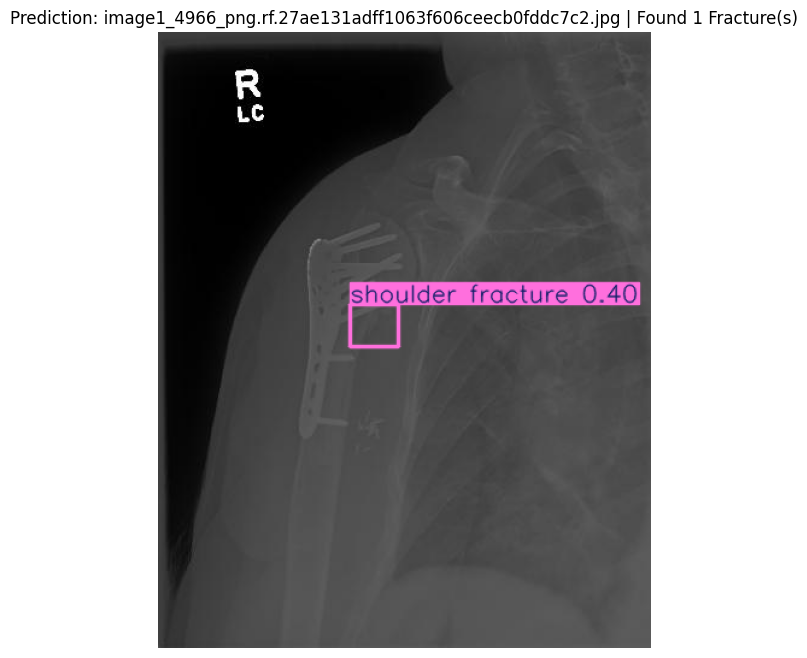

Found 1 potential fracture(s):
  Detected: shoulder fracture with confidence 0.40

--- Results for image1_496_png.rf.be69c35487b2531b272b242febfdebb1.jpg ---
No fractures detected in this image.

--- Results for image1_497_png.rf.d6769296bd5c7ac8218ae363a5dc3968.jpg ---
No fractures detected in this image.

--- Results for image1_508_png.rf.63f80ba9eca75737d7435b9122d70288.jpg ---


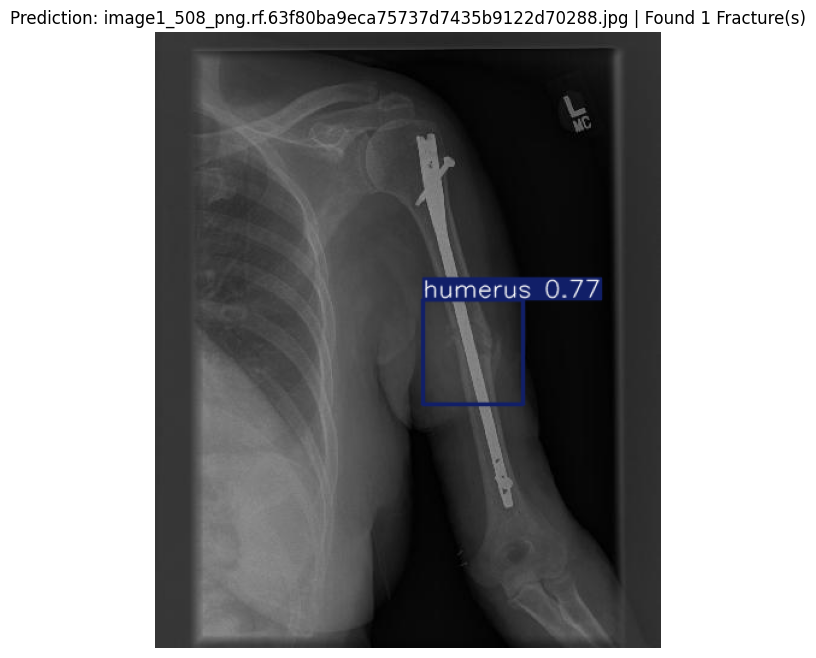

Found 1 potential fracture(s):
  Detected: humerus with confidence 0.77

--- Results for image1_509_png.rf.4b918f154cece667f6fe4ec2e676eaf1.jpg ---
No fractures detected in this image.

--- Results for image1_511_png.rf.9e17ffe27582ff4724db0edbc22118ba.jpg ---
No fractures detected in this image.

--- Results for image1_51_png.rf.56172f90bd654dcc6cc4ac47f79988a2.jpg ---
No fractures detected in this image.

--- Results for image1_52_png.rf.b194877235d291ca9e2e8824392bf776.jpg ---


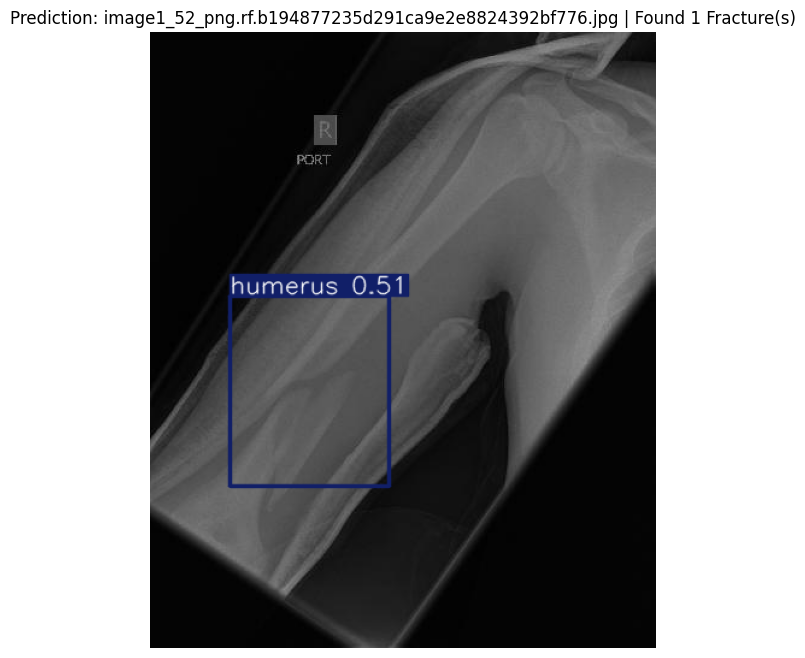

Found 1 potential fracture(s):
  Detected: humerus with confidence 0.51

--- Results for image1_536_png.rf.20bf7f571e4badd6d76c3a8894575eb7.jpg ---


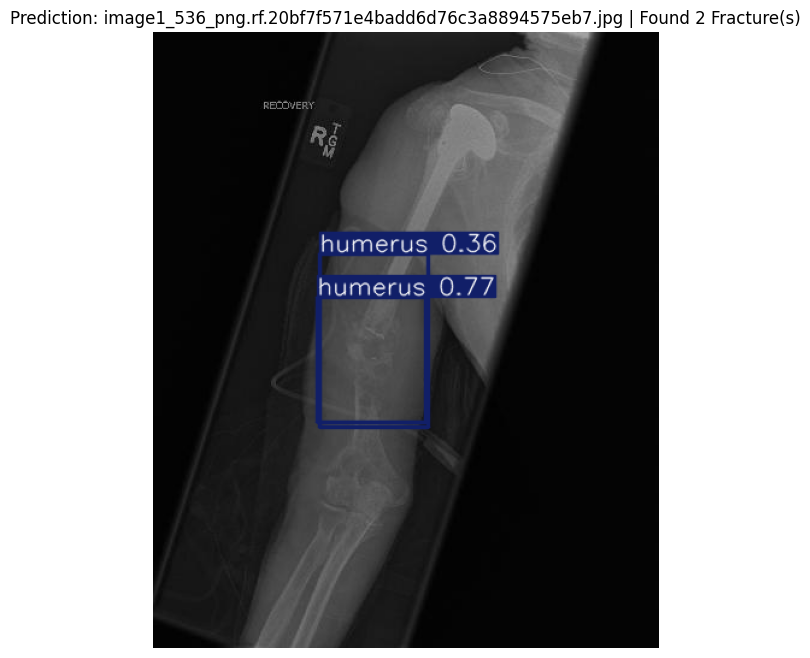

Found 2 potential fracture(s):
  Detected: humerus with confidence 0.77
  Detected: humerus with confidence 0.36

--- Results for image1_537_png.rf.06ee5106226a244e50fa61450224633b.jpg ---
No fractures detected in this image.

--- Results for image1_540_png.rf.0e3e26d67bb471fb263c983cdf758c46.jpg ---
No fractures detected in this image.

--- Results for image1_5740_png.rf.9e24e104e841b740e0389637d5e6d2d7.jpg ---


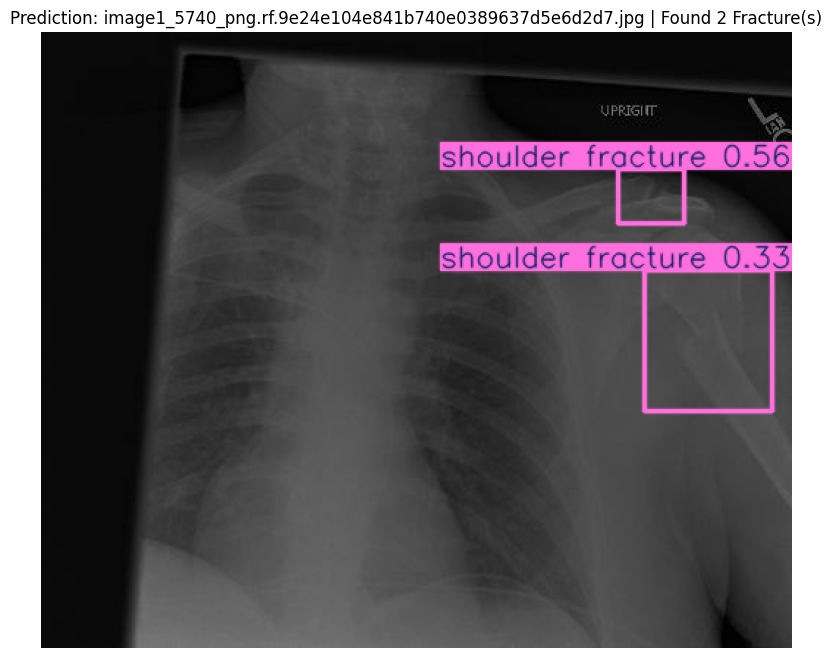

Found 2 potential fracture(s):
  Detected: shoulder fracture with confidence 0.56
  Detected: shoulder fracture with confidence 0.33

--- Results for image1_594_png.rf.08dd02caad7756ae235e1ff58a0205b6.jpg ---


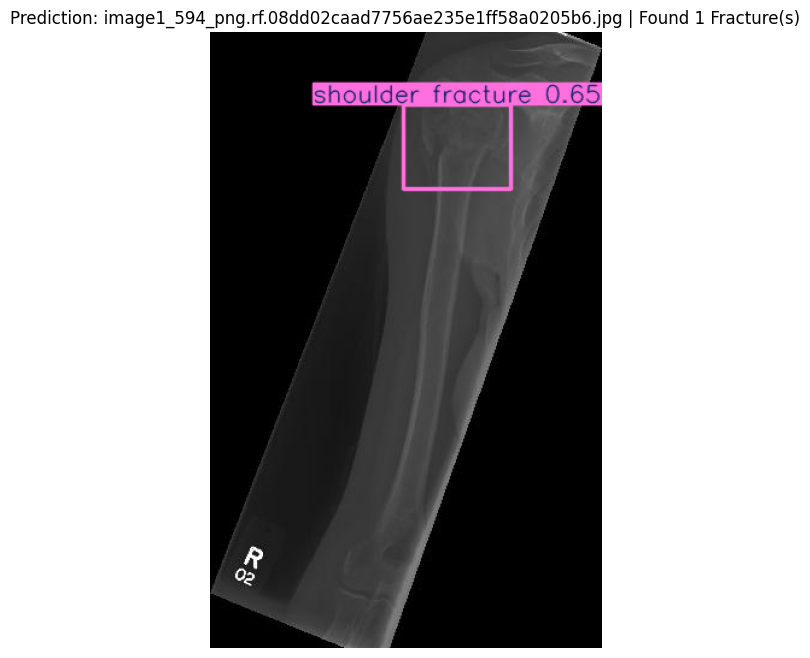

Found 1 potential fracture(s):
  Detected: shoulder fracture with confidence 0.65

--- Results for image1_6234_png.rf.564f9903c116204416868f0a2273e6ba.jpg ---


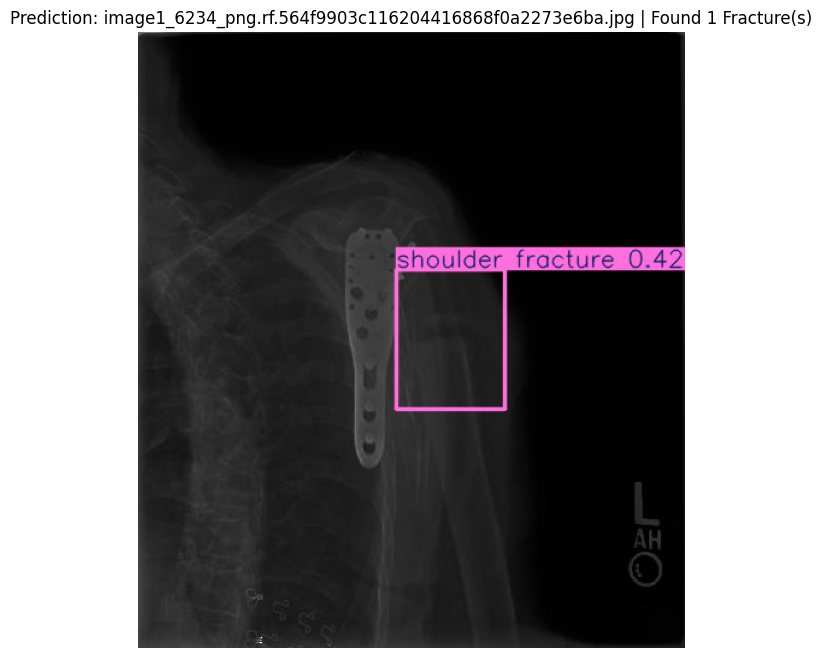

Found 1 potential fracture(s):
  Detected: shoulder fracture with confidence 0.42

--- Results for image1_623_png.rf.056fad4c4c1c2381cdabf35f947ab1bb.jpg ---
No fractures detected in this image.

--- Results for image1_62_png.rf.49b4ef3c363843b800174d2fdfc56ee8.jpg ---
No fractures detected in this image.

--- Results for image1_633_png.rf.9bd74183541bd851e79f94d3f07c50d6.jpg ---
No fractures detected in this image.

--- Results for image1_635_png.rf.87aa3f97aeaffa79004761ae1f895cac.jpg ---
No fractures detected in this image.

--- Results for image1_637_png.rf.750d1e44edbbb461c9505f1d9c0e4a02.jpg ---
No fractures detected in this image.

--- Results for image1_639_png.rf.915590376683dad767046b536acd3b19.jpg ---


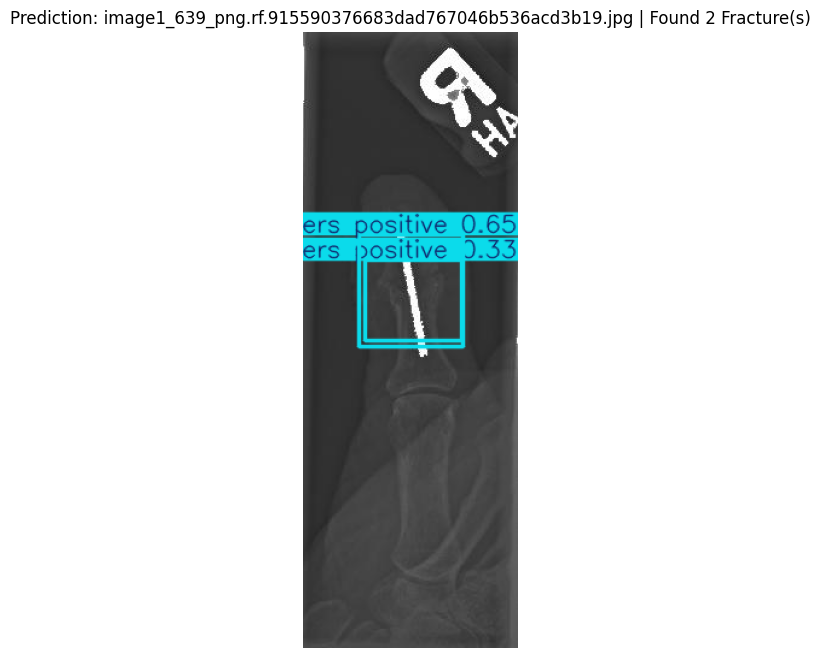

Found 2 potential fracture(s):
  Detected: fingers positive with confidence 0.65
  Detected: fingers positive with confidence 0.33

--- Results for image1_645_png.rf.402f6afd337e508ac75cc56d0ecf912c.jpg ---
No fractures detected in this image.

--- Results for image1_6478_png.rf.eee144dfa7e8712592f7d8b10523e2fa.jpg ---


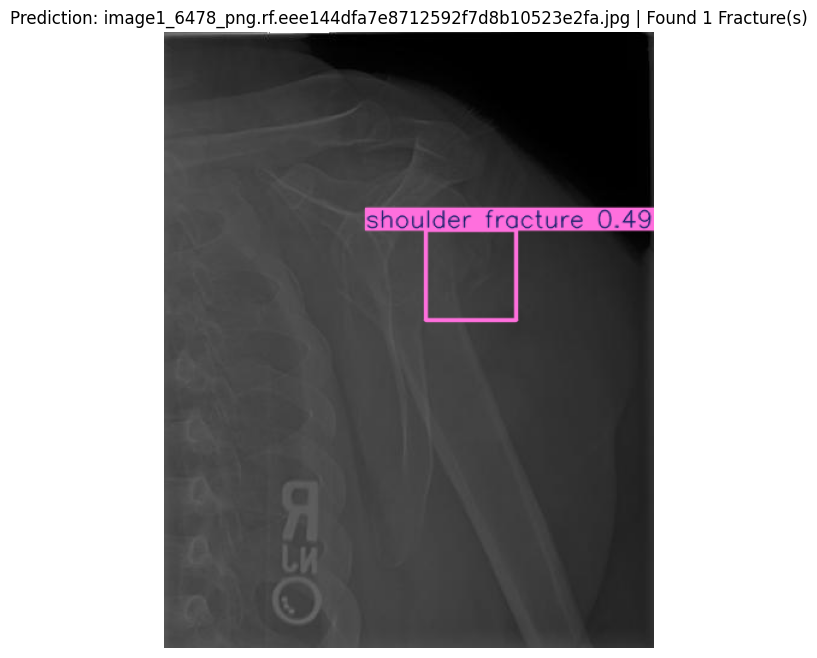

Found 1 potential fracture(s):
  Detected: shoulder fracture with confidence 0.49

--- Results for image1_651_png.rf.c3391a5ae823bf5de28ed36b3f23f93a.jpg ---
No fractures detected in this image.

--- Results for image1_663_png.rf.460908c550b08162d5553b1073c8495c.jpg ---
No fractures detected in this image.

--- Results for image1_670_png.rf.da8ddaaa5ef3e99f8da51b6664740aa4.jpg ---
No fractures detected in this image.

--- Results for image1_673_png.rf.fbe0dea2deaf75d49f079ca7d33abe14.jpg ---
No fractures detected in this image.

--- Results for image1_674_png.rf.9c85436fb6b27fc193107ee487555959.jpg ---
No fractures detected in this image.

--- Results for image1_68_png.rf.9e3dfa26e497af0a8f676a9686fd0e20.jpg ---
No fractures detected in this image.

--- Results for image1_6973_png.rf.6a71f376e7ce54b8e8d484d17e699596.jpg ---
No fractures detected in this image.

--- Results for image1_704_png.rf.e3668d404753b933e1fd9500e697ca8c.jpg ---
No fractures detected in this image.

--- Results f

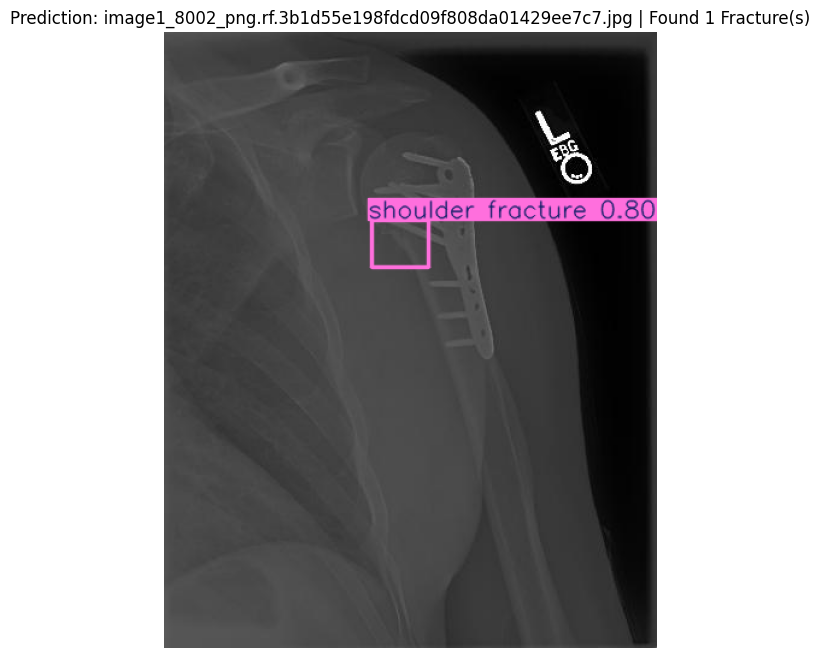

Found 1 potential fracture(s):
  Detected: shoulder fracture with confidence 0.80

--- Results for image1_848_png.rf.029e1130bf23b22edbf687ed6b1902ed.jpg ---


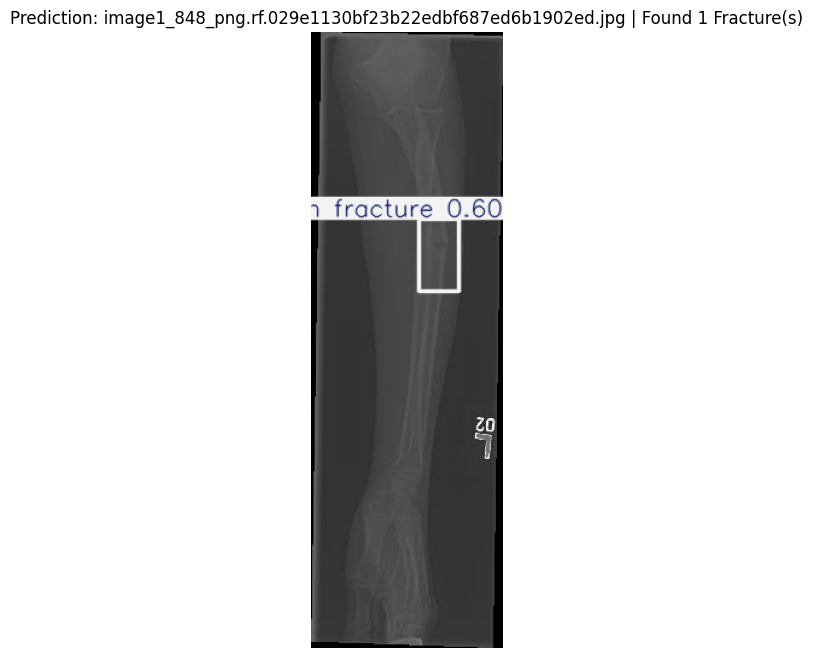

Found 1 potential fracture(s):
  Detected: forearm fracture with confidence 0.60

--- Results for image1_852_png.rf.b721589a516459f110ab073a190f3f0f.jpg ---
No fractures detected in this image.

--- Results for image1_860_png.rf.37fd7f57d0b9ec38eafafceacdbd4f4c.jpg ---
No fractures detected in this image.

--- Results for image1_92_png.rf.108b5397d94ff8c3c87cc885247ef603.jpg ---
No fractures detected in this image.

--- Results for image1_9_png.rf.063293a5d91155202c1ec5f03dd1170b.jpg ---
No fractures detected in this image.

--- Results for image2_1421_png.rf.b623cea6c9617fcf2f09843434e25218.jpg ---
No fractures detected in this image.

--- Results for image2_1540_png.rf.46ec2cd9f9775a6e815e5062658d9fb0.jpg ---


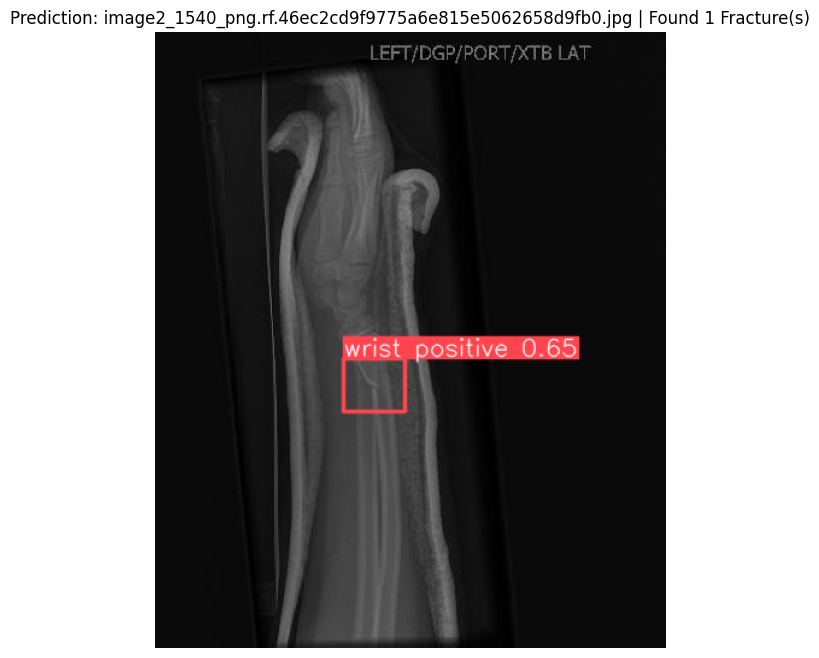

Found 1 potential fracture(s):
  Detected: wrist positive with confidence 0.65

--- Results for image2_1718_png.rf.3320525501293fd17921dbca2ec70ebf.jpg ---
No fractures detected in this image.

--- Results for image2_1758_png.rf.be01737bb3e65525d2fcac4a9814624f.jpg ---
No fractures detected in this image.

--- Results for image2_176_png.rf.87231f93e98596a5a1b52ef2fd5a7871.jpg ---
No fractures detected in this image.

--- Results for image2_199_png.rf.111ecddb2bdc3542d7f953385d1bb03b.jpg ---


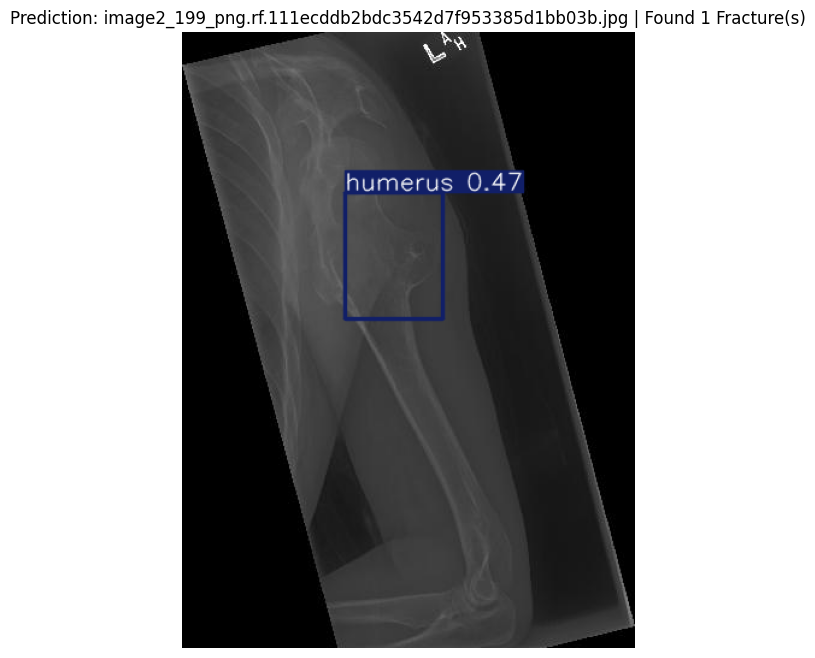

Found 1 potential fracture(s):
  Detected: humerus with confidence 0.47

--- Results for image2_232_png.rf.66b26e2592f806b3b659538ae42a2e74.jpg ---
No fractures detected in this image.

--- Results for image2_636_png.rf.3a27fb8f5d5892ce33733630521b1e3d.jpg ---
No fractures detected in this image.

--- Results for image2_641_png.rf.ca0bfddb8b5ac5e97fa841e32c94ad9a.jpg ---
No fractures detected in this image.

--- Results for image2_698_png.rf.66b6d614653eed2ef4e81695aca5c5a6.jpg ---
No fractures detected in this image.

--- Results for image2_812_png.rf.cfcd3189eb853066fc4819ad746775a6.jpg ---
No fractures detected in this image.

--- Results for image2_849_png.rf.761ec251e358a15e08cdad95fd41492a.jpg ---


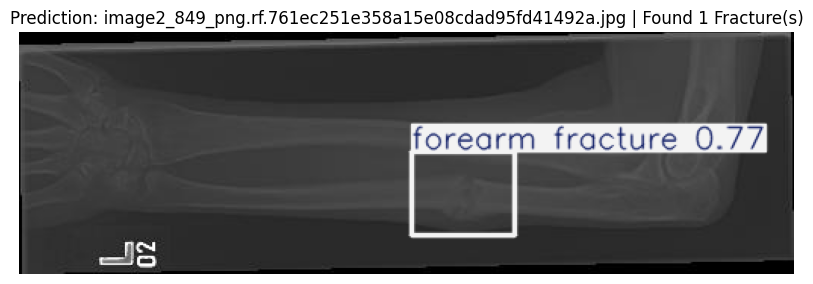

Found 1 potential fracture(s):
  Detected: forearm fracture with confidence 0.77

--- Results for image2_953_png.rf.97a41890b4badde45bfc390f9f5c9d12.jpg ---


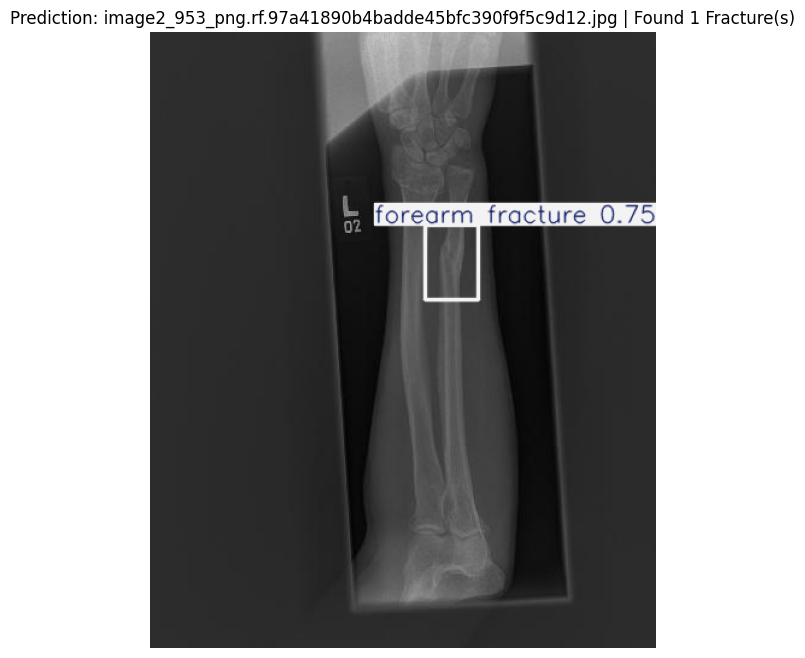

Found 1 potential fracture(s):
  Detected: forearm fracture with confidence 0.75


In [ ]:
import cv2
import matplotlib.pyplot as plt


for i, r in enumerate(results):

    img_name = os.path.basename(r.path) if hasattr(r, 'path') else f"Image #{i+1}"

    print(f"\n--- Results for {img_name} ---")


    if len(r.boxes) > 0:

        pred_image_bgr = r.plot()

        # Convert BGR to RGB
        pred_image_rgb = cv2.cvtColor(pred_image_bgr, cv2.COLOR_BGR2RGB)


        plt.figure(figsize=(10, 8))
        plt.imshow(pred_image_rgb)
        plt.title(f"Prediction: {img_name} | Found {len(r.boxes)} Fracture(s)", fontsize=12)
        plt.axis('off')
        plt.show()

        print(f"Found {len(r.boxes)} potential fracture(s):")
        for box in r.boxes:
            conf = box.conf.item()
            cls_id = box.cls.item()
            label = r.names[cls_id]


            print(f"  Detected: {label} with confidence {conf:.2f}")

    else:
        print("No fractures detected in this image.")